# Figure S1: 6 panel plot
This notebook produces figure S1 of Tankersley et al. 2022. It is a 6 panel figure, showing various gridded dataset for the Ross Ice Shelf area. These include a) free-air gravity, b) magnetics, c) our sediment thickness, d) previous estimates of sediment thickness, e) bathymetry, and f) differece between the two sediment thickness models

In [7]:
# import necessary python packages
import pygmt
import geopandas as gpd
import os

In [8]:
# all file paths assume this notebook is in /RIS_basement_sediment/figures
pwd = os.getcwd()
pwd

'C:\\Users\\mtankersley\\Documents\\Python_Scripts\\RIS_basement_sediment\\Figures'

## Prep data

### Shaded basement regions

In [33]:
pygmt.grdfilter(grid='../data/main_results/RIS_basement_filt.nc', 
                filter='g120000', nans='r', distance='0', 
                outgrid='../data/results/RIS_basement_120k_filt.nc')

pygmt.grdclip(grid='../data/results/RIS_basement_120k_filt.nc', 
              outgrid='../data/results/basement_highs.nc', 
              below='-1600/NaN')

pygmt.grdclip(grid='../data/results/RIS_basement_120k_filt.nc', 
              outgrid='../data/results/basement_lows.nc', 
              above='-2600/NaN')

### Sediment thickness difference

In [31]:
# subtract Lindeque sediment thickness from ours
!gmt grdmath -Df ../data/main_results/RIS_sediment.nc ../data/results/RIS_lindeque_sediment.nc  SUB = ../data/results/RIS_sediment_difference.nc

## Figure parameters

In [24]:
# set our PyGMT figure parameters, 
# we will use an Antarctic Polar Stereographic projection (EPSG3031)
# set the region of our figure, in meters from the South Pole
e= -660_000
n= -1_500_000
w= 450_000
s= -400_000

#set figure height, width and map scale
fig_height = 180 # in mm
fig_width = fig_height*(w-e)/(s-n)
fig_ratio = (s-n)/(fig_height/1000)

# Make a GMT region string and projection strings in both ESPG3031 and Lat/Lon
fig_reg = f'{e}/{w}/{n}/{s}'
fig_proj = f"x1:{fig_ratio}"
fig_proj_ll = f"s0/-90/-71/1:{fig_ratio}"

bar_width = fig_width/10 * 0.4 # colorbar 40% of figure width
pos_str = f'jBL+w{bar_width}c/.5c+jTL+o1.2c/-2.4c+h'

## Figure functions

### general features

In [25]:
# since were duplicating lots of section of these 6 plots, we'll put 
#some of it in a function we can call each time
def add_map_features(label):   
    global gl, cl, fig_proj, fig_reg, fig_proj_ll
    # plot graticules overtop, at 4d latitude and 30d longitude
    with pygmt.config(MAP_ANNOT_OFFSET_PRIMARY = '-2p', MAP_FRAME_TYPE = 'inside',
                      MAP_ANNOT_OBLIQUE = 0, FONT_ANNOT_PRIMARY = '8p,black,-=2p,white', 
                      MAP_GRID_PEN_PRIMARY = 'grey', MAP_TICK_LENGTH_PRIMARY = '-10p',
                      MAP_TICK_PEN_PRIMARY = 'thinnest,grey', FORMAT_GEO_MAP = 'dddF',
                      MAP_POLAR_CAP = '90/90', ):
        fig.basemap(projection = fig_proj_ll, region = fig_reg,
                    frame = ["NSWE", "xa30g15", "ya4g2"], verbose='e')
        with pygmt.config(FONT_ANNOT_PRIMARY = '8p,black'):
            fig.basemap(projection = fig_proj_ll, region = fig_reg,
                    frame = ["NSWE", "xa30", "ya4"], verbose='e') 

    # scalebar
    with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '16p,black', MAP_SCALE_HEIGHT='8p', MAP_TICK_PEN_PRIMARY = '0.5p,black'):
        fig.basemap(region = fig_reg, projection = fig_proj_ll, map_scale='jBR+w200k+c170E/71S+f+l"km"+ar+o1.7c/0.6c', verbose='e') 
        
    fig.text(projection = fig_proj, 
        region = fig_reg,
        position='TL',
        text = label,
        fill = 'white',
        font = '40p,Helvetica,black',
        offset = 'j.5/.5',
        clearance = '+tO')

### faults

In [26]:
inactive_normal = gpd.read_file('../data/shapefiles/RIS_inactive_faults_normal.shp')
inactive_ll = gpd.read_file('../data/shapefiles/RIS_inactive_faults_left_lateral.shp')
inactive = gpd.read_file('../data/shapefiles/RIS_inactive_faults.shp')
active = gpd.read_file('../data/shapefiles/RIS_active_faults.shp')

In [27]:
# same with a func for plotting faults
def plot_faults(active_color='black', inactive_color='white'):
    pen_fault=f'1.8p,{inactive_color},10_2'#10:2 dash:gap
    hatch_style='f+.4c/.3c+l+i'
    # Plot christines inactive faults, with hatches
    fig.plot(projection = fig_proj, data = inactive_normal, pen=pen_fault)
    fig.plot(data = inactive_normal, pen=f'1.2p,{inactive_color},10_2', style=hatch_style) #f for front, +.6c/0.3c for a tick every .6c, .3c long, +l for left side.
    # Left lateral, with arrows
    fig.plot(data = inactive_ll, pen=pen_fault)
    fig.plot(data = inactive_ll, pen=f'1.5p,{inactive_color}', style='f-1c/.6c+l+s45+i') #f for front, -1 for 1 arrow, .8c for size of arrow, +l for left side, +s45 for arrow angle, +i for invisible line
    # no kinematics
    fig.plot(data = inactive, pen=pen_fault)
    # Plot christines active faults, with hatches
    fig.plot(data = active, pen=f'1.8p,{active_color},10_2')
    fig.plot(data = active, pen=f'1.2p,{active_color},10_2', style=hatch_style) # f for front, +.3c/.3c for tick every .3c, .3c long, , +l for left side, +i for invisible        

## Make figure

C:\Users\mtankersley\miniforge3\envs\basement\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\mtankersley\miniforge3\envs\basement\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\mtankersley\miniforge3\envs\basement\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\mtankersley\miniforge3\envs\basement\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appr

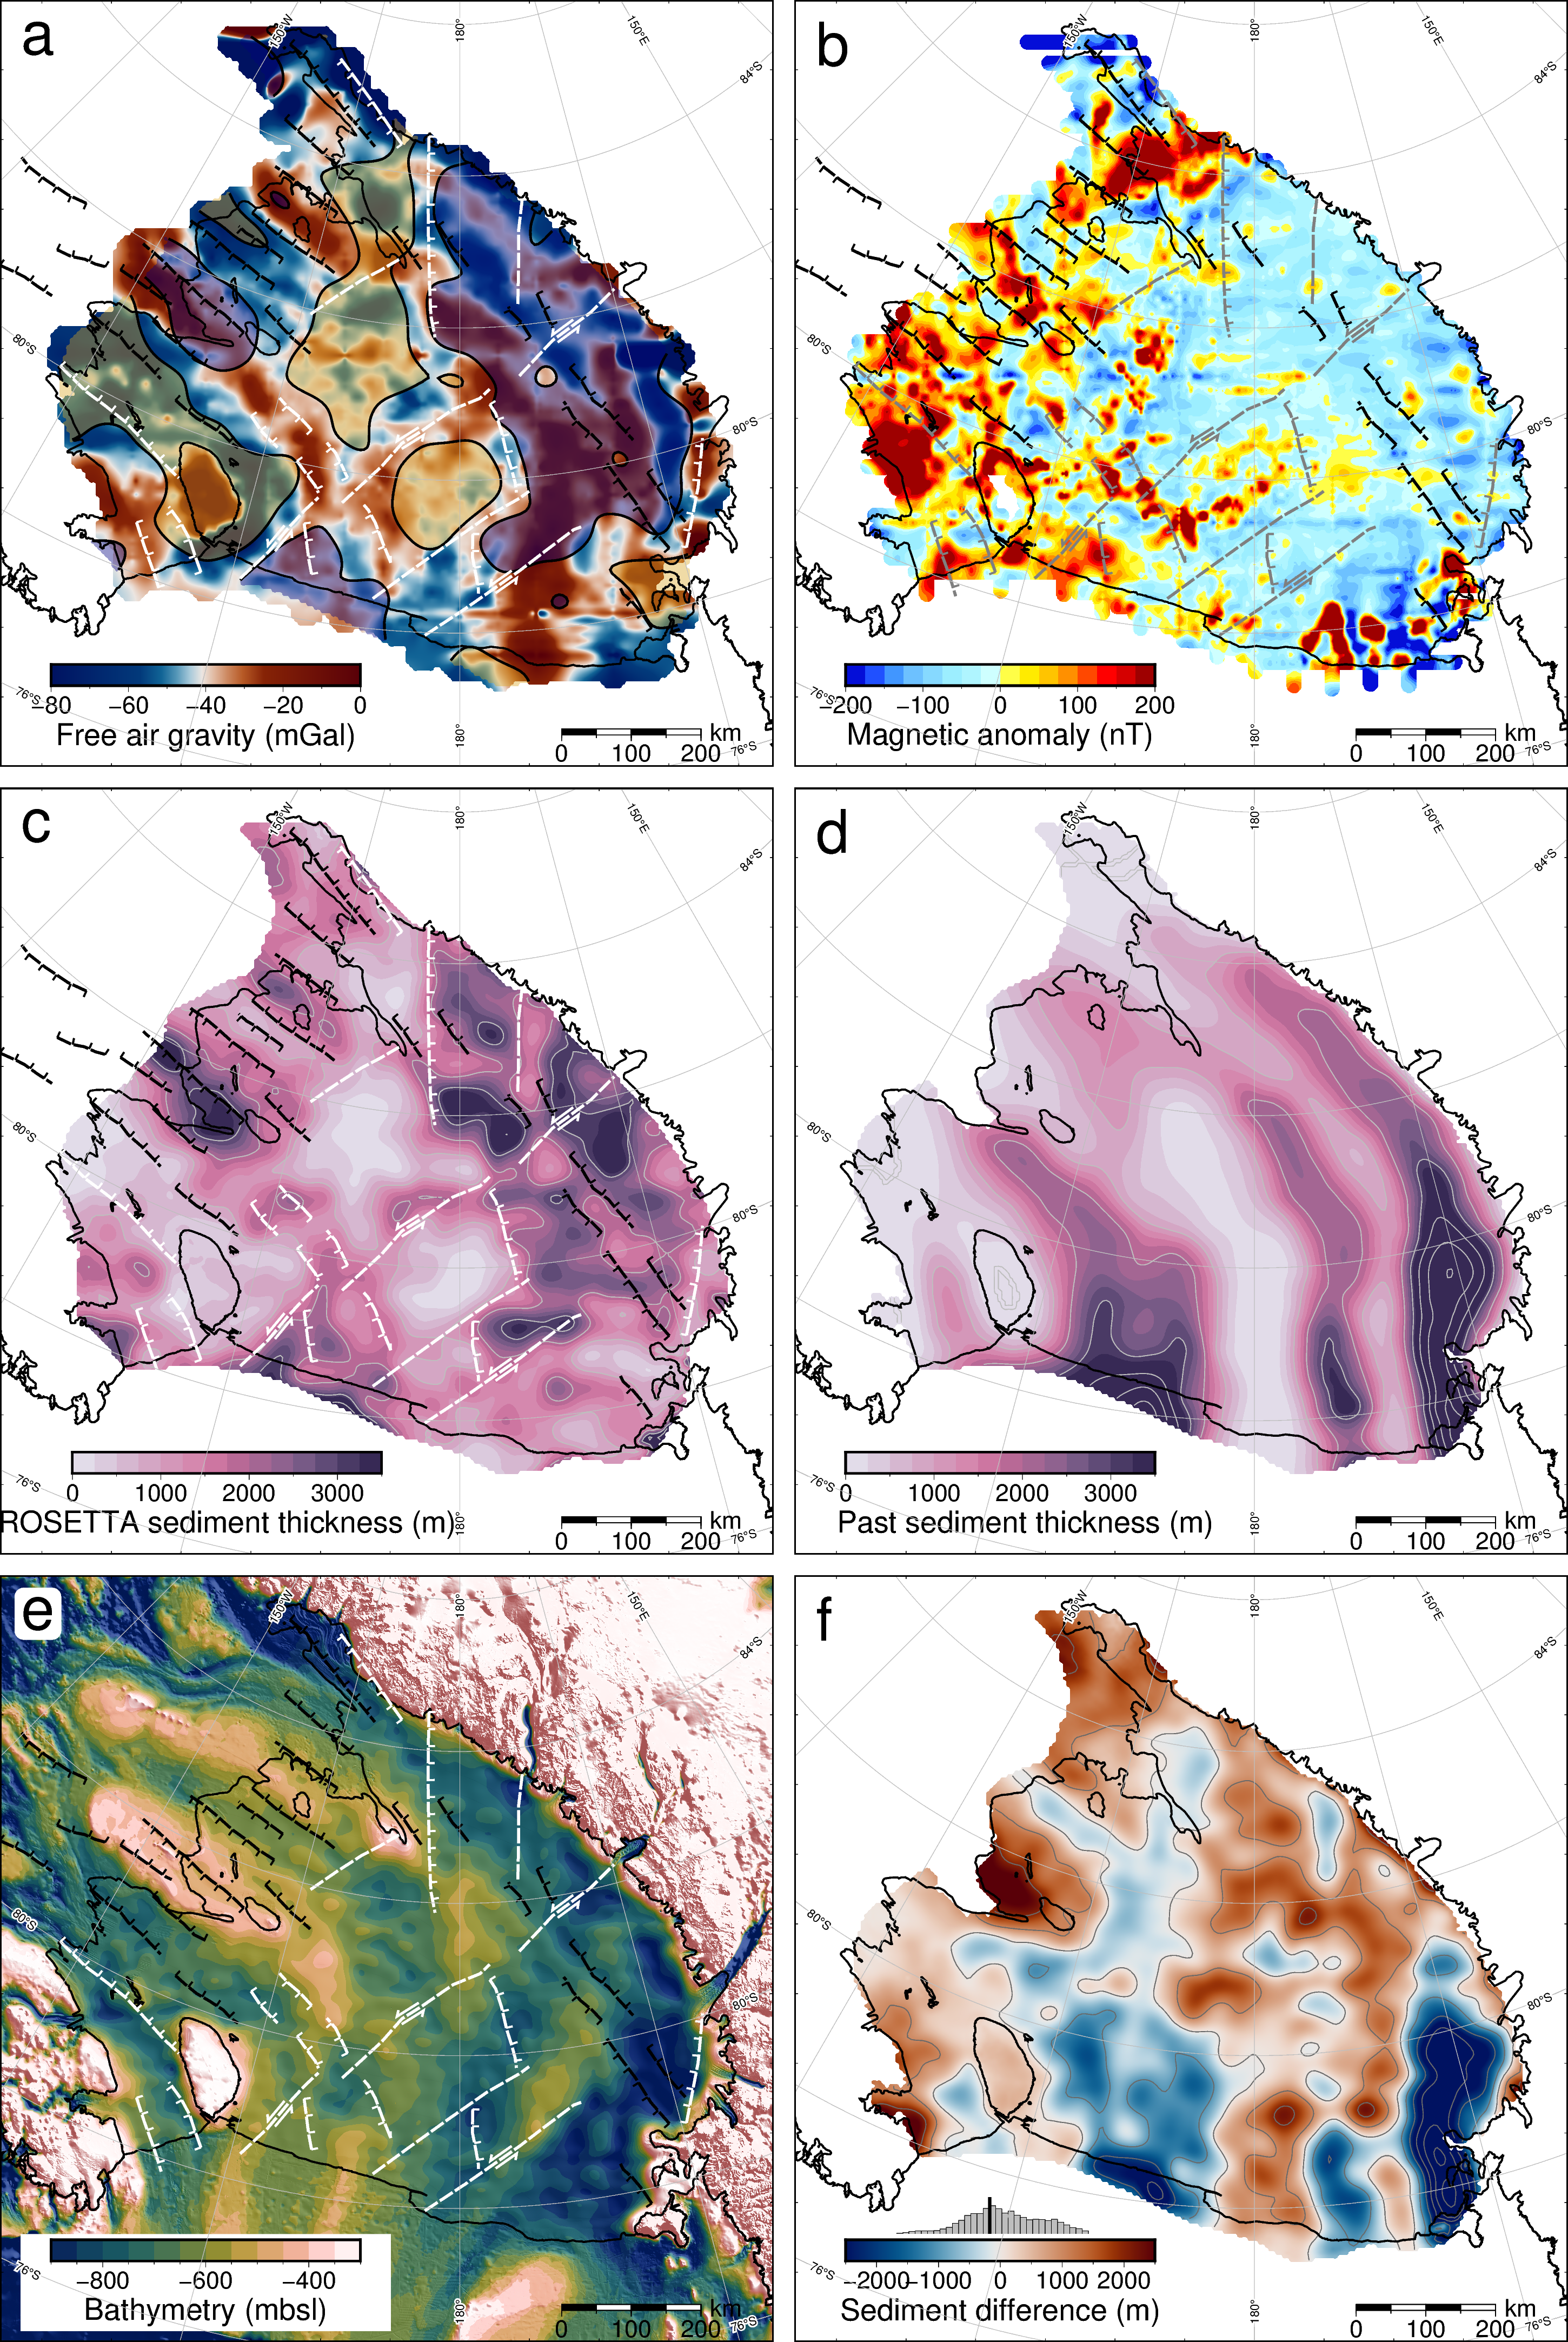

CPU times: total: 1min 31s
Wall time: 2min 15s


In [28]:
%%time
# 2mins 14s
# initialize the figure
fig = pygmt.Figure()

############################
############################
# 5th FIGURE Bathy
############################
############################

grid='../data/results/BedMachine_bed_wgs.nc'
cmap= '../data/plotting/RE_bathymetry.cpt'
frame=['xa200f50+l"Bathymetry (mbsl)"']

pygmt.grd2cpt(grid=grid, cmap='batlowW', limit='-900/-300', nlevels=13, output=cmap)        

with pygmt.config(MAP_FRAME_TYPE = 'inside'):
    fig.grdimage(region = fig_reg, projection = fig_proj, frame=["nwse", "xf100000", "yf100000", "g0"], 
                 grid=grid, cmap=cmap, shading="grdgradient+a45+ne.5", nan_transparent=True, dpi=500)

# fig.grdcontour(grid=grid, interval=500, pen='thinner,gray')

with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '20p,black'):
        fig.colorbar(cmap=cmap, position = pos_str,  box = '+gwhite+c3p', frame=frame, verbose='e')

fig.plot(data=gpd.read_file('../data/shapefiles/GroundingLine_Antarctica_v02.shp'), 
         pen = '1.2p,black', verbose='e')
fig.plot(data= gpd.read_file('../data/shapefiles/Coastline_Antarctica_v02.shp'), 
         pen='1.2p,black', verbose='e')

plot_faults()       

add_map_features(label='e')

############################
############################
fig.shift_origin(xshift=(fig_width/10)+.5, yshift=0)
# 6th FIGURE Sed Thick Diff
############################
############################

grid='../data/results/RIS_sediment_difference.nc'
cmap='../data/plotting/sed_thickness_diff.cpt'
frame=['xa1000f500+l"Sediment difference (m)"']

pygmt.makecpt(cmap='vik', background='o', series='-2500/2500', output=cmap)

with pygmt.config(MAP_FRAME_TYPE = 'inside'):
    fig.grdimage(region = fig_reg, projection = fig_proj, frame=["nwse", "xf100000", "yf100000", "g0"], 
                 grid=grid, cmap=cmap, nan_transparent=True, dpi=500)

fig.grdcontour(grid=grid, interval=1000, pen='thinner,dimgray')#, cut = "300000c")

hist_reg = '-2500/2500/0/7',   # this needs to match CMAP limits, 0/14 of 0-14% for histogram
sed_diff=pygmt.grd2xyz(grid=grid)
fig.shift_origin(xshift='.8c', yshift="2.4c",)
fig.histogram( data=sed_diff.z,
                region=hist_reg,
                fill='grey',
                projection=f"X{bar_width}c/1c",
                frame=False,
                series=100,#width of bin in data units
                pen=".1p",
                histtype=1) 
fig.plot(x=[sed_diff.z.mean(),sed_diff.z.mean()], y=[0,7], pen='2p,black')
fig.shift_origin(xshift='-.8c', yshift="-2.4c",)

with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '20p,black'):
    fig.colorbar(cmap=cmap, position = pos_str, box = '+gwhite+c3p', frame=frame, verbose='e')

fig.plot(region = fig_reg, projection = fig_proj, 
         data=gpd.read_file('../data/shapefiles/GroundingLine_Antarctica_v02.shp'), 
         pen = '1.2p,black', verbose='e')
fig.plot(data= gpd.read_file('../data/shapefiles/Coastline_Antarctica_v02.shp'), 
         pen='1.2p,black', verbose='e')

add_map_features(label='f')

############################
###########################
fig.shift_origin(xshift=0, yshift=(fig_height/10)+.5)
# 4th FIGURE Lindeque Sed Thick  
############################
############################

grid='../data/results/RIS_lindeque_sediment.nc'
cmap='../data/plotting/sediment.cpt'
frame=['xa1000f500+l"      Past sediment thickness (m)"']

with pygmt.config(MAP_FRAME_TYPE = 'inside'):
    fig.grdimage(region = fig_reg, projection = fig_proj, frame=["nwse", "xf100000", "yf100000", "g0"], 
                 grid=grid, cmap=cmap, nan_transparent=True, dpi=500)

fig.grdcontour(grid=grid, interval=1000, pen='thinner,gray,')

with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '20p,black'):
        fig.colorbar(cmap=cmap, position = pos_str,  box = '+gwhite+c3p', frame=frame, verbose='e')

fig.plot(data=gpd.read_file('../data/shapefiles/GroundingLine_Antarctica_v02.shp'), 
         pen = '1.2p,black', verbose='e')
fig.plot(data= gpd.read_file('../data/shapefiles/Coastline_Antarctica_v02.shp'), 
         pen='1.2p,black', verbose='e')

add_map_features(label='d')

############################
###########################
fig.shift_origin(xshift=(-fig_width/10)-.5, yshift=0)
# 3rd FIGURE ROSETTA Sed Thick  
############################
############################

grid='../data/main_results/RIS_sediment.nc'
cmap='../data/plotting/sediment.cpt'
frame=['xa1000f500+l"ROSETTA sediment thickness (m)"']

pos_str2 = f'jBL+w{bar_width}c/.5c+jTL+o1.7c/-2.4c+h' 

with pygmt.config(MAP_FRAME_TYPE = 'inside'):
    fig.grdimage(region = fig_reg, projection = fig_proj, frame=["nwse", "xf100000", "yf100000", "g0"], 
                 grid=grid, cmap=cmap, nan_transparent=True, dpi=500)

fig.grdcontour(grid=grid, interval=1000, pen='thinner,gray,')

with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '20p,black'):
        fig.colorbar(cmap=cmap, position = pos_str2,  box = '+gwhite+c3p', frame=frame, verbose='e')

fig.plot(data=gpd.read_file('../data/shapefiles/GroundingLine_Antarctica_v02.shp'), 
         pen = '1.2p,black', verbose='e')
fig.plot(data= gpd.read_file('../data/shapefiles/Coastline_Antarctica_v02.shp'), 
         pen='1.2p,black', verbose='e')
        
plot_faults()
    
add_map_features(label='c')

############################
###########################
fig.shift_origin(xshift=(fig_width/10)+.5, yshift=(fig_height/10)+.5)
# 2nd FIGURE Mag 
############################
############################

grid='../data/results/rosetta_mag.nc'
cmap='../data/plotting/RIS_mag_full.cpt'
frame=['xa100f50+l"Magnetic anomaly (nT)"']

pygmt.makecpt(series='-200/200', cmap='panoply', background='o', output=cmap)

with pygmt.config(MAP_FRAME_TYPE = 'inside'):
    fig.grdimage(region = fig_reg, projection = fig_proj, frame=["nwse", "xf100000", "yf100000", "g0"], 
                 grid=grid, cmap=cmap, nan_transparent=True, dpi=500)

with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '20p,black'):
        fig.colorbar(cmap=cmap, position = pos_str,  box = '+gwhite+c3p', frame=frame, verbose='e')

fig.plot(data=gpd.read_file('../data/shapefiles/GroundingLine_Antarctica_v02.shp'), 
         pen = '1.2p,black', verbose='e')
fig.plot(data= gpd.read_file('../data/shapefiles/Coastline_Antarctica_v02.shp'), 
         pen='1.2p,black', verbose='e')

plot_faults(active_color='black', inactive_color='gray50')
    
add_map_features(label='b')

############################
############################
fig.shift_origin(xshift=(-fig_width/10)-.5, yshift=0)
# 1st FIGURE Grav
############################
############################

grid='../data/results/rosetta_grav.nc'
cmap='../data/plotting/rosetta_grav.cpt'
frame=['xa20f10+l"Free air gravity (mGal)"']

pygmt.grd2cpt(grid=grid, cmap='vik', limit='-80/0', continuous=True, output=cmap)


with pygmt.config(MAP_FRAME_TYPE = 'inside'):
    fig.grdimage(region = fig_reg, projection = fig_proj, frame=["nwse", "xf100000", "yf100000", "g0"], 
                 grid=grid, cmap=cmap, nan_transparent=True, dpi=500)
    
with pygmt.config(FONT_ANNOT_PRIMARY = '16p,black', FONT_LABEL = '20p,black'):
        fig.colorbar(cmap=cmap, position = pos_str,  box = '+gwhite+c3p', frame=frame, verbose='e')

pygmt.makecpt(cmap = 'goldenrod', series='-1700/0', output = '../data/plotting/basement_highs.cpt')
fig.grdimage(grid='../data/results/basement_highs.nc', cmap='../data/plotting/basement_highs.cpt', nan_transparent=True,dpi='600', transparency=60)

pygmt.makecpt(cmap = 'navy', series='-5000/-2500', output = '../data/plotting/basement_lows.cpt')
fig.grdimage(grid='../data/results/basement_lows.nc', cmap='../data/plotting/basement_lows.cpt', nan_transparent=True,dpi='600', transparency=60)

fig.grdcontour(grid='../data/results/RIS_basement_120k_filt.nc', interval=1600, limit='-1601/-1599', pen='thicker,black',)
fig.grdcontour(grid='../data/results/RIS_basement_120k_filt.nc', interval=2600, limit='-2601/-2599', pen='thicker,black',)

fig.plot(data=gpd.read_file('../data/shapefiles/GroundingLine_Antarctica_v02.shp'), 
         pen = '1.2p,black', verbose='e')
fig.plot(data= gpd.read_file('../data/shapefiles/Coastline_Antarctica_v02.shp'), 
         pen='1.2p,black', verbose='e')

plot_faults()

add_map_features(label='a')

fig.show(dpi=200)

## Save figure

In [29]:
out='outputs/FigS1_six_panel.jpg'
fig.savefig(out, dpi=200)